In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip3 install jupyterlab_tabnine

In [1]:
# !pip3 install ipython-autotime
# !pip3 install swifter
# !pip3 install imageio
# !pip3 install twython
# import nltk

# nltk.download('averaged_perceptron_tagger')
# nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/vahid_ghafouri/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/vahid_ghafouri/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# !pip3 install matplotlib
# !pip3 install PIL
# !pip3 install wordcloud

     |████████████████████████████████| 10.3 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 45.1 MB/s eta 0:00:01
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
     |████████████████████████████████| 371 kB 2.5 MB/s eta 0:00:01
time: 15.9 s (started: 2021-08-02 09:55:38 +00:00)


In [1]:
from Gender_Bias_Reddit_Library import *
%load_ext autotime

time: 483 µs (started: 2022-05-05 13:22:43 +00:00)


In [2]:
# subreddits=['random','nonToxic','IncelTear','MGTOW','TheRedPill','Feminism','AskFeminists','askwomen',
#             'trollxchromosomes','TrollYChromosome','MGTOW2', 'FemaleDatingStrategy','thegirlsurvivalguide',
#             'MensRights','MensLib','AskMen']
subreddits=['nonToxic','random','TheRedPill','MGTOW','MGTOW2','MensRights','MensLib' ,'TrollYChromosome',
            'IncelTear',
            'trollxchromosomes', 'FemaleDatingStrategy','thegirlsurvivalguide','Feminism','AskFeminists','askwomen']
# subreddits=['trollxchromosomes']
misandries=[]
misogynies=[]
misandry_error=[]
misogyny_error=[]

sexism_ethnic=pd.DataFrame()    

pronoun = 'ethnic'
for subreddit_to_crawl in subreddits:
    print(colored(subreddit_to_crawl,'red'))
    misandry=[]
    misogyny=[]
    for i in range(1,11):
        bb=pd.read_excel(My_Folder_Path+'Datasets/Word_Lists/{}_{}_Bootstrap_{}.xlsx'.format(subreddit_to_crawl,pronoun,i))
        bb['freq_pctrank']=bb['freq'].rank(pct=True)
        bb.fillna(0, inplace=True)
        bb = bb[(bb['bias']>0.005) | (-0.005>bb['bias'])]
        sexism_index=sexism_finder(df=bb)
        misandry.append(sexism_index[0])
        misogyny.append(sexism_index[1])
    #     misandry_error.append((sexism_index[0][1]-sexism_index[0][2])/-2)
    #     misogyny_error.append((sexism_index[1][1]-sexism_index[1][2])/-2)
    #     print('Misandry CI is: {}'.format(tuple([i * 100 for i in mean_confidence_interval(df2['bias']*(df2['freq_pctrank']**2)*-df2['hate'], confidence=0.95)])))
    print('Misandry is: {}'.format(mean_confidence_interval(misandry)))
    print('Misogyny is: {}'.format(mean_confidence_interval(misogyny)))
    print('Sexism is: {}'.format(-mean_confidence_interval(misandry)[0]+mean_confidence_interval(misogyny)[0]))
    sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],
                         'misandry_UB':mean_confidence_interval(misandry)[2], 'misogyny_mean':mean_confidence_interval(misogyny)[0],
                         'misogyny_LB':mean_confidence_interval(misogyny)[1], 'misogyny_UB':mean_confidence_interval(misogyny)[2]}, ignore_index = True)
#     print('Bias vs Hate Correlation (Misandry): {}'.format(spearmanr(df2['bias']*(df2['freq_pctrank']**0),-df2['hate'])))
#     print('Bias vs Hate Correlation (Misogyny): {}'.format(spearmanr(-df1['bias']*(df1['freq_pctrank']**0),-df1['hate'])))
    print('\n')

nonToxic
Misandry is: (0.0023791849506723224, 0.002086407787163914, 0.002671962114180731)
Misogyny is: (0.0019793890016331006, 0.001880047742264189, 0.002078730261002012)
Sexism is: -0.0003997959490392219


/tmp/ipykernel_3044159/1552056546.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],




random
Misandry is: (0.0033122397699404753, 0.003195628732380373, 0.0034288508075005775)
Misogyny is: (0.003583752651563484, 0.0033820498252888145, 0.0037854554778381537)
Sexism is: 0.00027151288162300877


TheRedPill


/tmp/ipykernel_3044159/1552056546.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.0026510265956057296, 0.0024974335481320713, 0.002804619643079388)
Misogyny is: (0.005864681449430875, 0.005559789018393103, 0.006169573880468648)
Sexism is: 0.003213654853825146


MGTOW


/tmp/ipykernel_3044159/1552056546.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.0025030852564743387, 0.002373433808012394, 0.0026327367049362835)
Misogyny is: (0.006071469701892548, 0.0057991488580795125, 0.006343790545705583)
Sexism is: 0.0035683844454182092


MGTOW2


/tmp/ipykernel_3044159/1552056546.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.0020909217525819784, 0.001983075732804072, 0.0021987677723598847)
Misogyny is: (0.005425592343015784, 0.005242197479457398, 0.00560898720657417)
Sexism is: 0.0033346705904338057


MensRights


/tmp/ipykernel_3044159/1552056546.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.002270307670851874, 0.00209844527825358, 0.0024421700634501683)
Misogyny is: (0.0028507128275418623, 0.0026899119789614173, 0.0030115136761223074)
Sexism is: 0.0005804051566899882


MensLib


/tmp/ipykernel_3044159/1552056546.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.0018355247298658451, 0.0017755768523761613, 0.001895472607355529)
Misogyny is: (0.003211289469518008, 0.0031149386114080403, 0.0033076403276279752)
Sexism is: 0.0013757647396521627


TrollYChromosome


/tmp/ipykernel_3044159/1552056546.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.0032378612342552904, 0.003017493403180915, 0.003458229065329666)
Misogyny is: (0.004147179283047827, 0.0038641706082554726, 0.0044301879578401825)
Sexism is: 0.000909318048792537


IncelTear


/tmp/ipykernel_3044159/1552056546.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.005359952206269029, 0.004959367297934957, 0.005760537114603101)
Misogyny is: (0.010064832424712084, 0.009660134389708419, 0.01046953045971575)
Sexism is: 0.004704880218443055


trollxchromosomes


/tmp/ipykernel_3044159/1552056546.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.003684309383645618, 0.0033839573138096895, 0.003984661453481546)
Misogyny is: (0.003537767461291966, 0.0033374282709889187, 0.003738106651595013)
Sexism is: -0.00014654192235365225


FemaleDatingStrategy


/tmp/ipykernel_3044159/1552056546.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.005655770191704532, 0.005379622382939189, 0.005931918000469875)
Misogyny is: (0.005436050397794992, 0.005246169830957675, 0.005625930964632308)
Sexism is: -0.00021971979390953984


thegirlsurvivalguide


/tmp/ipykernel_3044159/1552056546.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.003389369069493767, 0.0032346985984375567, 0.003544039540549977)
Misogyny is: (0.0025371738771115806, 0.002404316469810462, 0.0026700312844126993)
Sexism is: -0.0008521951923821862


Feminism


/tmp/ipykernel_3044159/1552056546.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.0029580807880632233, 0.002793232475069011, 0.0031229291010574354)
Misogyny is: (0.0023661952315844957, 0.002261501773299938, 0.0024708886898690535)
Sexism is: -0.0005918855564787276


AskFeminists


/tmp/ipykernel_3044159/1552056546.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.0017136698143529468, 0.0015757602893225191, 0.0018515793393833744)
Misogyny is: (0.002190907308601376, 0.002081282742562856, 0.002300531874639896)
Sexism is: 0.0004772374942484292


askwomen


/tmp/ipykernel_3044159/1552056546.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.0020237768125261706, 0.0018462846630305147, 0.0022012689620218265)
Misogyny is: (0.002855428459852892, 0.002700581679380927, 0.003010275240324857)
Sexism is: 0.0008316516473267214


time: 1min 48s (started: 2022-05-05 13:23:22 +00:00)


/tmp/ipykernel_3044159/1552056546.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_ethnic = sexism_ethnic.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


In [2]:
def sexism_finder_normalized (df):
    df.fillna(0, inplace=True)
    df1=df[df.bias<0]
    df2=df[df.bias>0]
    misogyny = ((df1['bias'].abs()*(df1['freq_pctrank']**1)*df1['hate'].abs()).sum())/((df1['bias'].abs()*(df1['freq_pctrank']**1)).sum())
    misandry = ((df2['bias'].abs()*(df2['freq_pctrank']**1)*df2['hate'].abs()).sum())/((df2['bias'].abs()*(df2['freq_pctrank']**1)).sum())
    return misandry, misogyny, -misandry+misogyny

time: 11.3 ms (started: 2022-03-18 17:54:48 +00:00)


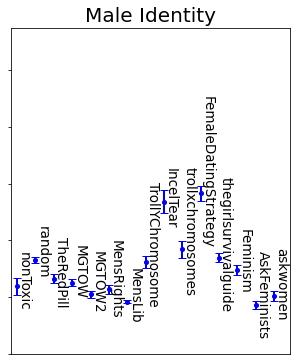

time: 1.14 s (started: 2022-05-05 13:26:45 +00:00)


In [3]:
import matplotlib.pyplot as plt

x_dummy=list(range(1,len(sexism_ethnic['community'])+1))

plt.figure(figsize=(5,6))
plt.errorbar(x=x_dummy, y = sexism_ethnic['misandry_mean'], yerr=sexism_ethnic['misandry_mean']-sexism_ethnic['misandry_LB'],markersize='4',markerfacecolor='blue',markeredgecolor='blue',capsize=4, elinewidth=2, xerr=None, fmt='o', color='blue')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, right='off', left='off', labelleft='off')
for i, txt in enumerate(sexism_ethnic['community']):
    plt.annotate(txt, (x_dummy[i], sexism_ethnic['misandry_mean'][i]-0.00009*len(txt)),rotation=270,fontsize=13.5)
plt.ylim(-0.00,0.0115)
plt.xlim(0.65,15.85)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
# plt.ylabel('Toxicity Level',fontsize=25, color='darkgreen')
plt.title('Male Identity',fontsize=20)
plt.savefig("Datasets/Sexism_Results/Misandry_Ethnic.jpeg",bbox_inches = 'tight', format="jpeg", dpi=550)


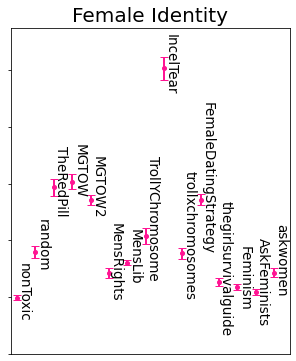

time: 1.08 s (started: 2022-05-05 11:08:04 +00:00)


In [56]:
import matplotlib.pyplot as plt

x_dummy=list(range(1,len(sexism_ethnic['community'])+1))

plt.figure(figsize=(5,6))
plt.errorbar(x=x_dummy, y = sexism_ethnic['misogyny_mean'], yerr=sexism_ethnic['misogyny_mean']-sexism_ethnic['misogyny_LB'],markersize='4',markerfacecolor='deeppink',markeredgecolor='deeppink',capsize=4, elinewidth=2, xerr=None, fmt='o', color='deeppink')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, right='off', left='off', labelleft='off')
# plt.set_yticklabels([])
for i, txt in enumerate(sexism_ethnic['community']):
    plt.annotate(txt, (x_dummy[i], sexism_ethnic['misogyny_mean'][i]-0.00009*len(txt)),rotation=270,fontsize=13.5)
plt.ylim(-0.00,0.0115)
plt.xlim(0.65,15.85)

ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
# plt.ylabel('toxicity level')
plt.title('Female Identity',fontsize=20)
plt.savefig("Datasets/Sexism_Results/Misogyny_Ethnic.jpeg", bbox_inches = 'tight',format="jpeg", dpi=550)

In [41]:

# subreddits=['random','nonToxic','IncelTear','MGTOW','TheRedPill','Feminism','AskFeminists','askwomen',
#             'trollxchromosomes','TrollYChromosome','MGTOW2', 'FemaleDatingStrategy','thegirlsurvivalguide',
#             'MensRights','MensLib','AskMen']

subreddits=['nonToxic','random','TheRedPill','MGTOW','MGTOW2','MensRights','MensLib' ,'TrollYChromosome',
            'IncelTear',
            'trollxchromosomes', 'FemaleDatingStrategy','thegirlsurvivalguide','Feminism','AskFeminists','askwomen']
# subreddits=['nonToxic']
sexism_individual=pd.DataFrame()

pronoun = 'individual'
for subreddit_to_crawl in subreddits:
    print(colored(subreddit_to_crawl,'red'))
    misandry=[]
    misogyny=[]
    for i in range(1,11):
        bb=pd.read_excel(My_Folder_Path+'Datasets/Word_Lists/{}_{}_Bootstrap_{}.xlsx'.format(subreddit_to_crawl,pronoun,i))
        bb['freq_pctrank']=bb['freq'].rank(pct=True)
        bb.fillna(0, inplace=True)
        bb = bb[(bb['bias']>0.005) | (-0.005>bb['bias'])]
        sexism_index=sexism_finder(df=bb)
        misandry.append(sexism_index[0])
        misogyny.append(sexism_index[1])
    #     misandry_error.append((sexism_index[0][1]-sexism_index[0][2])/-2)
    #     misogyny_error.append((sexism_index[1][1]-sexism_index[1][2])/-2)
    #     print('Misandry CI is: {}'.format(tuple([i * 100 for i in mean_confidence_interval(df2['bias']*(df2['freq_pctrank']**2)*-df2['hate'], confidence=0.95)])))
    print('Misandry is: {}'.format(mean_confidence_interval(misandry)))
    print('Misogyny is: {}'.format(mean_confidence_interval(misogyny)))
    print('Sexism is: {}'.format(-mean_confidence_interval(misandry)[0]+mean_confidence_interval(misogyny)[0]))
    sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],
                     'misandry_UB':mean_confidence_interval(misandry)[2], 'misogyny_mean':mean_confidence_interval(misogyny)[0],
                     'misogyny_LB':mean_confidence_interval(misogyny)[1], 'misogyny_UB':mean_confidence_interval(misogyny)[2]}, ignore_index = True)

#     print('Bias vs Hate Correlation (Misandry): {}'.format(spearmanr(df2['bias']*(df2['freq_pctrank']**0),-df2['hate'])))
#     print('Bias vs Hate Correlation (Misogyny): {}'.format(spearmanr(-df1['bias']*(df1['freq_pctrank']**0),-df1['hate'])))
    print('\n')

nonToxic
Misandry is: (0.0013131266707228186, 0.0011659196789378752, 0.001460333662507762)
Misogyny is: (0.0008930434583913755, 0.0008256147288929995, 0.0009604721878897515)
Sexism is: -0.00042008321233144314


random


/tmp/ipykernel_2981405/1947282076.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.002110857333267099, 0.0019258215559913494, 0.0022958931105428486)
Misogyny is: (0.003044838433017098, 0.0027716365045787426, 0.0033180403614554536)
Sexism is: 0.000933981099749999


TheRedPill


/tmp/ipykernel_2981405/1947282076.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.004863646974158682, 0.004649261241723231, 0.005078032706594133)
Misogyny is: (0.009877286782800122, 0.009389388577034925, 0.01036518498856532)
Sexism is: 0.0050136398086414406


MGTOW


/tmp/ipykernel_2981405/1947282076.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.003802462973123525, 0.0035938248061799048, 0.004011101140067145)
Misogyny is: (0.008530102027207335, 0.008067146853892681, 0.008993057200521988)
Sexism is: 0.00472763905408381


MGTOW2


/tmp/ipykernel_2981405/1947282076.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.0035483772022482226, 0.003421657347767716, 0.0036750970567287294)
Misogyny is: (0.0073066698797094876, 0.007072815520520832, 0.007540524238898143)
Sexism is: 0.003758292677461265


MensRights


/tmp/ipykernel_2981405/1947282076.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.0019661757750431873, 0.0018181660694249666, 0.002114185480661408)
Misogyny is: (0.003215630126052085, 0.0028717595915182816, 0.0035595006605858887)
Sexism is: 0.0012494543510088978


MensLib


/tmp/ipykernel_2981405/1947282076.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.0023393690804775578, 0.0021914480952849444, 0.002487290065670171)
Misogyny is: (0.0031273172741333177, 0.002933765324294268, 0.0033208692239723673)
Sexism is: 0.00078794819365576


TrollYChromosome


/tmp/ipykernel_2981405/1947282076.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.004692843801672288, 0.004501928770892985, 0.0048837588324515905)
Misogyny is: (0.007244841192652993, 0.006846139186943835, 0.0076435431983621505)
Sexism is: 0.0025519973909807047


IncelTear


/tmp/ipykernel_2981405/1947282076.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.009810736382009747, 0.009342275534238493, 0.010279197229781002)
Misogyny is: (0.008722694793794863, 0.008374750369832816, 0.00907063921775691)
Sexism is: -0.0010880415882148844


trollxchromosomes


/tmp/ipykernel_2981405/1947282076.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.005178459774712463, 0.004776587159312676, 0.005580332390112251)
Misogyny is: (0.0033696703262998742, 0.003250002570427943, 0.0034893380821718056)
Sexism is: -0.001808789448412589


FemaleDatingStrategy


/tmp/ipykernel_2981405/1947282076.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.006159129984548109, 0.005695965721048933, 0.006622294248047285)
Misogyny is: (0.0044006501792278625, 0.004239443747352596, 0.004561856611103129)
Sexism is: -0.0017584798053202465


thegirlsurvivalguide


/tmp/ipykernel_2981405/1947282076.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.0034329414481201067, 0.0032004686071409666, 0.003665414289099247)
Misogyny is: (0.002271578385211099, 0.0021494556532984854, 0.0023937011171237125)
Sexism is: -0.0011613630629090078


Feminism


/tmp/ipykernel_2981405/1947282076.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.002916150889279284, 0.0026245380409232544, 0.0032077637376353137)
Misogyny is: (0.0032001597362237427, 0.002945505280149118, 0.0034548141922983674)
Sexism is: 0.00028400884694445867


AskFeminists


/tmp/ipykernel_2981405/1947282076.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.0018876320601197132, 0.0017120424063095743, 0.0020632217139298524)
Misogyny is: (0.0025738357277582365, 0.0024138243044837062, 0.0027338471510327668)
Sexism is: 0.0006862036676385233


askwomen


/tmp/ipykernel_2981405/1947282076.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


Misandry is: (0.001997415594669129, 0.0017745268615480792, 0.0022203043277901784)
Misogyny is: (0.002400056920855962, 0.0022608790086930544, 0.0025392348330188696)
Sexism is: 0.0004026413261868332


time: 1min 47s (started: 2022-05-05 10:28:07 +00:00)


/tmp/ipykernel_2981405/1947282076.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexism_individual = sexism_individual.append({'community':subreddit_to_crawl, 'misandry_mean':mean_confidence_interval(misandry)[0], 'misandry_LB':mean_confidence_interval(misandry)[1],


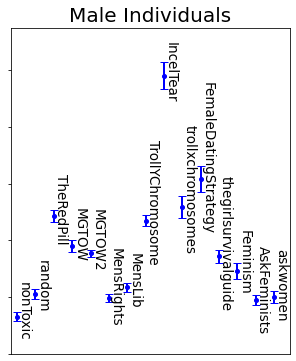

time: 1.06 s (started: 2022-05-05 11:07:49 +00:00)


In [55]:
x_dummy=list(range(1,len(sexism_individual['community'])+1))

plt.figure(figsize=(5,6))
plt.errorbar(x=x_dummy, y = sexism_individual['misandry_mean'], yerr=sexism_individual['misandry_mean']-sexism_individual['misandry_LB'],markersize='4',markerfacecolor='blue',markeredgecolor='blue',capsize=4, elinewidth=2, xerr=None, fmt='o', color='blue')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, right='off', left='off', labelleft='off')
for i, txt in enumerate(sexism_individual['community']):
    plt.annotate(txt, (x_dummy[i], sexism_individual['misandry_mean'][i]-0.00009*len(txt)),rotation=270,fontsize=13.5)
plt.ylim(-0.00,0.0115)
plt.xlim(0.65,15.85)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
# plt.ylabel('toxicity level')
plt.title('Male Individuals',fontsize=20)
plt.savefig("Datasets/Sexism_Results/Misandry_Individual.jpeg", bbox_inches = 'tight',format="jpeg", dpi=550)

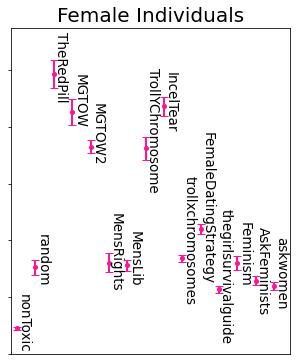

time: 1.1 s (started: 2022-05-05 11:36:05 +00:00)


In [59]:
x_dummy=list(range(1,len(sexism_individual['community'])+1))

plt.figure(figsize=(5,6))
plt.errorbar(x=x_dummy, y = sexism_individual['misogyny_mean'], yerr=sexism_individual['misogyny_mean']-sexism_individual['misogyny_LB'],markersize='4',markerfacecolor='deeppink',markeredgecolor='deeppink',capsize=4, elinewidth=2, xerr=None, fmt='o', color='deeppink')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, right='off', left='off', labelleft='off')
for i, txt in enumerate(sexism_individual['community']):
    plt.annotate(txt, (x_dummy[i], sexism_individual['misogyny_mean'][i]-0.00009*len(txt)),rotation=270,fontsize=13.5)
plt.ylim(-0.00,0.0115)
plt.xlim(0.65,15.85)
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
# plt.ylabel('toxicity level')
plt.title('Female Individuals',fontsize=20)
plt.savefig("Datasets/Sexism_Results/Misogyny_Individual.jpeg", bbox_inches = 'tight', format="jpeg", dpi=550)

# Similarity Table

In [13]:
subreddits=['TheRedPill','MGTOW','MGTOW2','MensRights','MensLib' ,'TrollYChromosome','IncelTear',
            'trollxchromosomes', 'FemaleDatingStrategy','thegirlsurvivalguide','Feminism','AskFeminists','askwomen']


similarity_matrix=pd.DataFrame(columns=['subreddit']+subreddits)
    
pronoun = 'identity'
pairs=[]
for subreddit_row in subreddits:
    
    row_df=pd.read_excel(My_Folder_Path+'Datasets/Word_Lists/{}_{}.xlsx'.format(subreddit_row,pronoun))
    row_df.fillna(0, inplace=True)
    row_df['sexism']=row_df['bias']*row_df['freq'].rank(pct=True)#*row_df['hate'].abs()
    row_df=row_df.sort_values(by=['sexism'], axis=0,ascending=False)
    new_row=[subreddit_row]    
    for subreddit_col in subreddits:
        
        col_df=pd.read_excel(My_Folder_Path+'Datasets/Word_Lists/{}_{}.xlsx'.format(subreddit_col,pronoun))
        col_df.fillna(0, inplace=True)
        col_df['sexism']=col_df['bias']*col_df['freq'].rank(pct=True)#*col_df['hate'].abs()
        col_df=col_df.sort_values(by=['sexism'], axis=0,ascending=False)
        if (subreddit_col,subreddit_row) not in pairs:
            num_of_commons=len(set(col_df['word'].tail(100)) - (set(col_df['word'].tail(100)) - set(row_df['word'].tail(100))))
        if (subreddit_col,subreddit_row) in pairs:
            num_of_commons=len(set(col_df['word'].head(100)) - (set(col_df['word'].head(100)) - set(row_df['word'].head(100))))
        new_row.append(num_of_commons)
        pairs.append((subreddit_row,subreddit_col))
        print ("{} vs {}: {}".format(subreddit_row,subreddit_col,str(num_of_commons)))
    similarity_matrix=similarity_matrix.append(dict(zip(['subreddit']+subreddits,new_row)), ignore_index=True)
similarity_matrix

TheRedPill vs TheRedPill: 100
TheRedPill vs MGTOW: 33
TheRedPill vs MGTOW2: 49
TheRedPill vs MensRights: 21
TheRedPill vs MensLib: 27
TheRedPill vs TrollYChromosome: 34
TheRedPill vs IncelTear: 31
TheRedPill vs trollxchromosomes: 14
TheRedPill vs FemaleDatingStrategy: 8
TheRedPill vs thegirlsurvivalguide: 10
TheRedPill vs Feminism: 10
TheRedPill vs AskFeminists: 14
TheRedPill vs askwomen: 7
MGTOW vs TheRedPill: 25
MGTOW vs MGTOW: 100
MGTOW vs MGTOW2: 48
MGTOW vs MensRights: 18
MGTOW vs MensLib: 17
MGTOW vs TrollYChromosome: 20
MGTOW vs IncelTear: 28
MGTOW vs trollxchromosomes: 8
MGTOW vs FemaleDatingStrategy: 14
MGTOW vs thegirlsurvivalguide: 15
MGTOW vs Feminism: 4
MGTOW vs AskFeminists: 7
MGTOW vs askwomen: 12
MGTOW2 vs TheRedPill: 28
MGTOW2 vs MGTOW: 30
MGTOW2 vs MGTOW2: 100
MGTOW2 vs MensRights: 21
MGTOW2 vs MensLib: 24
MGTOW2 vs TrollYChromosome: 26
MGTOW2 vs IncelTear: 29
MGTOW2 vs trollxchromosomes: 10
MGTOW2 vs FemaleDatingStrategy: 8
MGTOW2 vs thegirlsurvivalguide: 8
MGTOW2 vs

,subreddit,TheRedPill,MGTOW,MGTOW2,MensRights,MensLib,TrollYChromosome,IncelTear,trollxchromosomes,FemaleDatingStrategy,thegirlsurvivalguide,Feminism,AskFeminists,askwomen
0,TheRedPill,100,33,49,21,27,34,31,14,8,10,10,14,7
1,MGTOW,25,100,48,18,17,20,28,8,14,15,4,7,12
2,MGTOW2,28,30,100,21,24,26,29,10,8,8,5,7,8
3,MensRights,15,10,9,100,39,26,19,17,22,9,15,26,9
4,MensLib,21,10,13,28,100,44,34,19,22,6,13,29,11
5,TrollYChromosome,13,9,14,17,16,100,29,22,16,18,16,22,19
6,IncelTear,14,9,16,4,6,13,100,26,20,14,15,21,20
7,trollxchromosomes,5,5,6,9,9,18,15,100,29,22,36,39,27
8,FemaleDatingStrategy,4,7,7,6,3,11,15,23,100,19,25,18,30
9,thegirlsurvivalguide,3,10,6,7,1,8,5,14,28,100,13,16,37


time: 3min 26s (started: 2021-12-01 10:27:09 +00:00)


In [31]:
similarity_matrix.to_excel('Datasets/similarity_matrix.xlsx')

time: 30.7 ms (started: 2021-12-01 10:56:17 +00:00)


In [16]:
similarity_matrix=similarity_matrix.set_index('subreddit')

time: 1.9 ms (started: 2021-12-01 10:37:26 +00:00)


In [7]:
subreddits=['TheRedPill','MGTOW','MGTOW2','MensRights','MensLib' ,'TrollYChromosome','IncelTear',
            'trollxchromosomes', 'FemaleDatingStrategy','thegirlsurvivalguide','Feminism','AskFeminists','askwomen']

subreddit_row='Feminism'
subreddit_col='MensRights'
pronoun='identity'
row_df=pd.read_excel(My_Folder_Path+'Datasets/Word_Lists/{}_{}.xlsx'.format(subreddit_row,pronoun))
col_df=pd.read_excel(My_Folder_Path+'Datasets/Word_Lists/{}_{}.xlsx'.format(subreddit_col,pronoun))
row_df.fillna(0, inplace=True)
row_df['sexism']=row_df['bias']*row_df['freq'].rank(pct=True)#*row_df['hate'].abs()
row_df=row_df.sort_values(by=['sexism'], axis=0,ascending=False)
col_df.fillna(0, inplace=True)
col_df['sexism']=col_df['bias']*col_df['freq'].rank(pct=True)#*col_df['hate'].abs()
col_df=col_df.sort_values(by=['sexism'], axis=0,ascending=False)
print("Shared words biased toward women: ",set(col_df['word'].tail(100)) - (set(col_df['word'].tail(100)) - set(row_df['word'].tail(100))))
print("Shared words biased toward men: ",set(col_df['word'].head(100)) - (set(col_df['word'].head(100)) - set(row_df['word'].head(100))))

Shared words biased toward women:  {'professional', 'successful', 'young', 'famous', 'profitable', 'powerful', 'commercial', 'available', 'private', 'expensive', 'responsible', 'accessible', 'athletic', 'stable', 'exceptional'}
Shared words biased toward men:  {'pathological', 'unchecked', 'unproductive', 'irrational', 'pathetic', 'paternalistic', 'typical', 'nonsensical', 'mysoginistic', 'laughable', 'logical', 'rhetorical', 'pedantic'}
time: 2.4 s (started: 2021-12-03 15:12:20 +00:00)


In [26]:
for i in similarity_matrix.values:
    print (i)

[100 33 49 21 27 34 31 14 8 10 10 14 7]
[25 100 48 18 17 20 28 8 14 15 4 7 12]
[28 30 100 21 24 26 29 10 8 8 5 7 8]
[15 10 9 100 39 26 19 17 22 9 15 26 9]
[21 10 13 28 100 44 34 19 22 6 13 29 11]
[13 9 14 17 16 100 29 22 16 18 16 22 19]
[14 9 16 4 6 13 100 26 20 14 15 21 20]
[5 5 6 9 9 18 15 100 29 22 36 39 27]
[4 7 7 6 3 11 15 23 100 19 25 18 30]
[3 10 6 7 1 8 5 14 28 100 13 16 37]
[4 6 6 13 12 21 9 31 21 12 100 37 19]
[7 3 6 19 22 17 12 27 14 13 44 100 21]
[4 8 6 3 1 3 11 15 16 34 5 5 100]
time: 2.57 ms (started: 2021-12-01 10:53:15 +00:00)


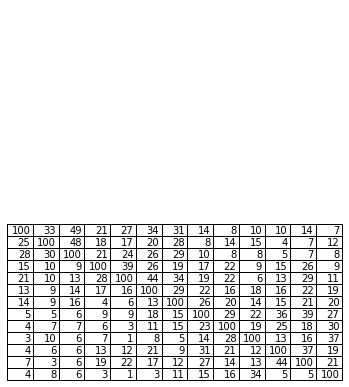

time: 1.85 s (started: 2021-12-01 10:51:16 +00:00)


In [24]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=similarity_matrix.values,cellColours=)
ax

# Word Cloud - Bias Based

In [173]:
bb=pd.read_excel(My_Folder_Path+'Datasets/Word_Lists/{}.xlsx'.format(subreddit_to_crawl))

time: 1.87 s (started: 2021-08-16 13:10:38 +00:00)


In [18]:
import imageio

male_mask = imageio.imread('Datasets/Word_Clouds/Male_Mask.png')
female_mask = imageio.imread('Datasets/Word_Clouds/Female_Mask.png')

time: 41.1 ms (started: 2021-08-17 10:06:30 +00:00)


In [19]:
male_mask[0][1]

Array([255, 255, 255, 255], dtype=uint8)

time: 4.44 ms (started: 2021-08-17 10:06:32 +00:00)


In [20]:
misandry_wordcloud = WordCloud(background_color="white",mask=male_mask,random_state=1)
misogyny_wordcloud = WordCloud(background_color="white",mask=female_mask,random_state=1)

time: 1.13 ms (started: 2021-08-17 10:06:33 +00:00)


In [21]:
my_misandry_wordcloud = misandry_wordcloud.generate_from_frequencies(dict(zip(bb['word'],round(bb['bias']*(bb['freq_pctrank']**2)*10000).apply(lambda x: 0 if x<1 else x))))
my_misogyny_wordcloud = misogyny_wordcloud.generate_from_frequencies(dict(zip(bb['word'],round(-bb['bias']*(bb['freq_pctrank']**2)*10000).apply(lambda x: 0 if x<1 else x))))

time: 1.53 s (started: 2021-08-17 10:06:35 +00:00)


In [ ]:
text_male

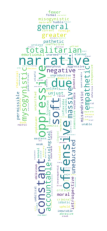

time: 590 ms (started: 2021-08-17 10:06:40 +00:00)


In [22]:
plt.figure()

# plt.imshow(my_misandry_wordcloud)#, interpolation='bilinear')
plt.imshow(my_misandry_wordcloud)
plt.axis("off")
plt.savefig("Datasets/Word_Clouds/{}_misandry.jpg".format(subreddit_to_crawl), format="jpg", dpi=300)

plt.show()

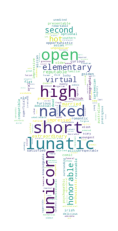

time: 603 ms (started: 2021-08-17 10:06:48 +00:00)


In [23]:
plt.figure()

# plt.imshow(my_misandry_wordcloud)#, interpolation='bilinear')
plt.imshow(my_misogyny_wordcloud)
plt.axis("off")
plt.savefig("Datasets/Word_Clouds/{}_misogyny.jpg".format(subreddit_to_crawl), format="jpg", dpi=300)

plt.show()

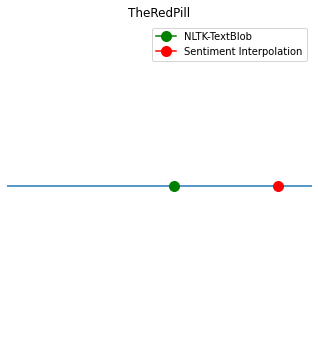

time: 702 ms (started: 2021-08-16 13:20:02 +00:00)


In [188]:
fig = plt.figure(figsize=(12, 6))


ax = fig.add_subplot(121)

ax.axhline(0.5,xmin=0,xmax=1)
ax.plot([sum(bb.bias*bb.freq_pctrank*((bb['sentTextBlob']+bb['sentNLTK'])/2))], [0.5], marker='o', markersize=10, color="green",label='NLTK-TextBlob')
ax.plot([sum(bb.bias*bb.freq_pctrank*bb['sentiment'])], [0.5], marker='o', markersize=10, color="red", label='Sentiment Interpolation')
ax.set_xlim([-8, 8])

ax.legend()
ax.set_title(subreddit_to_crawl)
ax.axis('off')
ax.figure.savefig("Datasets/Word_Clouds/{}_sexism_scalar.jpg".format(subreddit_to_crawl), format="jpg", dpi=300)